## Task - 2 Stock Market Prediction and Forecasting using Stacked LSTM

### Importing the necessary libraries

data set link : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [3]:
import sklearn
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
     

### Loading the dataset

In [6]:

#Import the data and remove rows containing NAN values
data = pd.read_csv('stocks.csv')
data = data.iloc[::-1]
     

In [8]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [11]:
data.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [12]:
for column in data.columns:
    print(column)

Date
Open
High
Low
Last
Close
Total Trade Quantity
Turnover (Lacs)


Date: Date of trade.

Open: Opening price of a stock.

High: Highest price of a day.

Low: Lowest price in a day.

Last: Last price.

Close: Closing price.

Total Trade Quantity: Total trade quantity of each day.

Turnover (Lacs): Total Turnover in Lacs.

In [13]:
data.isnull().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [14]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [15]:
data.size

16280

In [16]:
data.shape

(2035, 8)

In [18]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [21]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

## Data Cleaning and Preprocessing

In [22]:
duplicates = data.duplicated()
duplicates.value_counts()

False    2035
dtype: int64

In [23]:
##Hence there are no null values or duplicates in the data sets hence the cleaning is done


In [24]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


<Axes: >

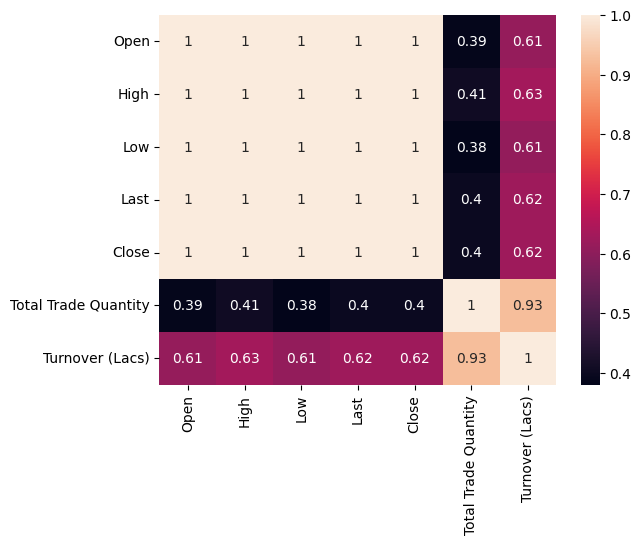

In [28]:
sns.heatmap(data.corr(),annot = True)

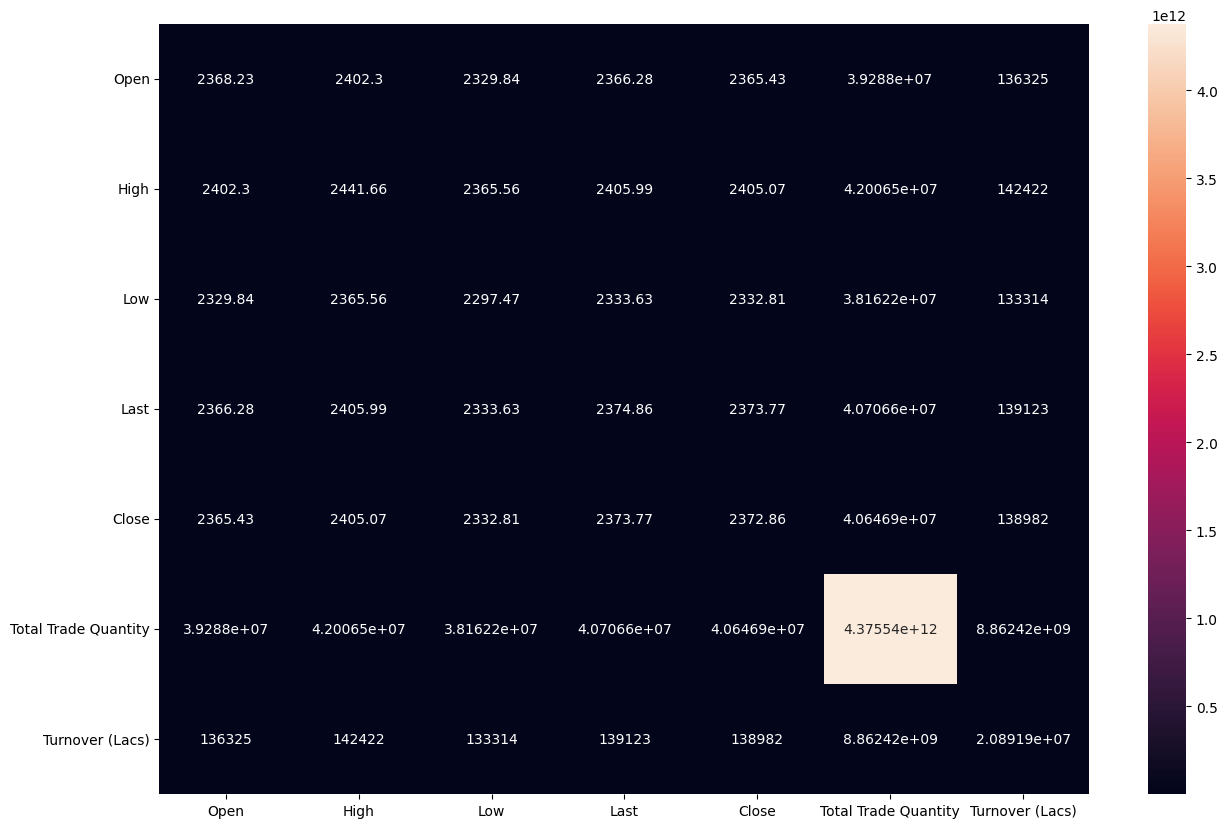

In [27]:

plt.figure(figsize = (15,10))
sns.heatmap(data.cov(), annot = True, fmt = 'g')
plt.show()
     

## Data Visualisation

### Plotting the graphs for Open, Close, High, Low, & Last price

<Figure size 2500x1500 with 0 Axes>

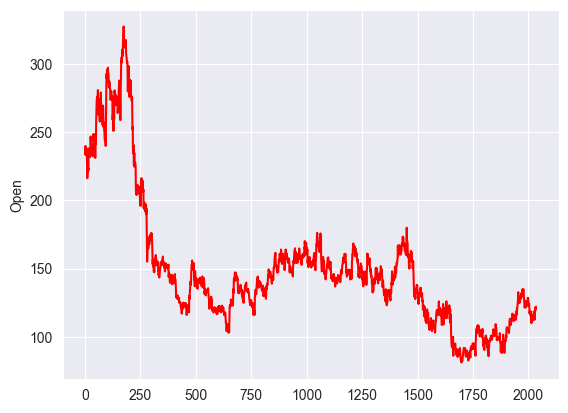

<Figure size 2500x1500 with 0 Axes>

In [46]:
sns.lineplot(data['Open'],color = 'red')
sns.set_style('darkgrid')

plt.figure(figsize=(25, 15))

<Figure size 2500x1500 with 0 Axes>

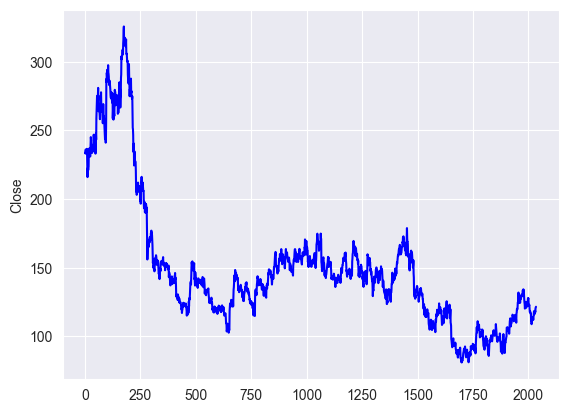

<Figure size 2500x1500 with 0 Axes>

In [47]:
sns.lineplot(data['Close'],color = 'blue')
sns.set_style('darkgrid')

plt.figure(figsize=(25, 15))

<Figure size 2500x1500 with 0 Axes>

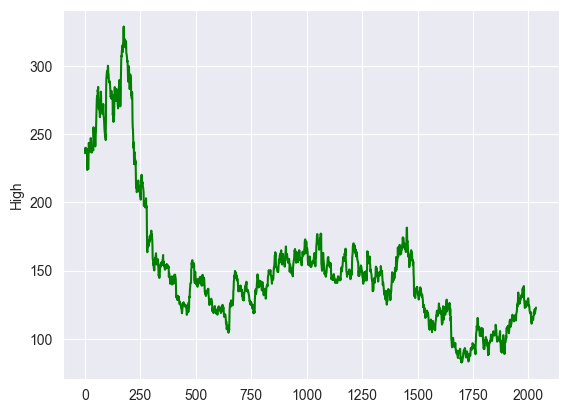

<Figure size 2500x1500 with 0 Axes>

In [50]:
sns.lineplot(data['High'],color = 'green')
sns.set_style('darkgrid')
plt.figure(figsize=(25, 15))

<Figure size 2500x1500 with 0 Axes>

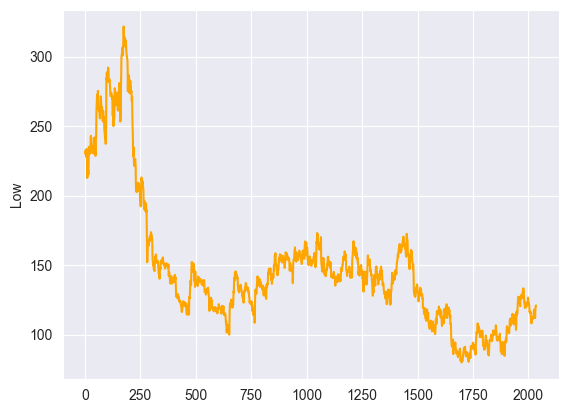

<Figure size 2500x1500 with 0 Axes>

In [51]:
sns.lineplot(data['Low'],color = 'orange')
sns.set_style('darkgrid')

plt.figure(figsize=(25, 15))

<Figure size 2500x1500 with 0 Axes>

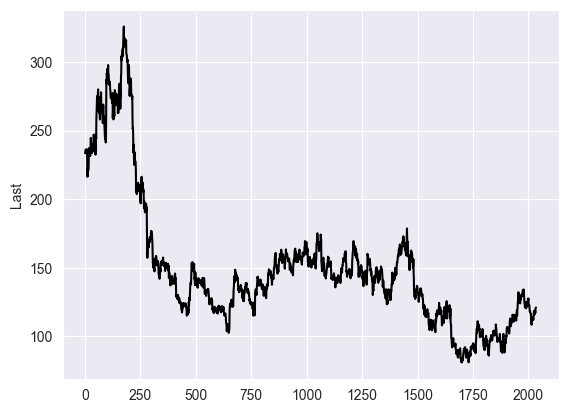

<Figure size 2500x1500 with 0 Axes>

In [53]:
sns.lineplot(data['Last'],color = 'black')
sns.set_style('darkgrid')

plt.figure(figsize=(25, 15))

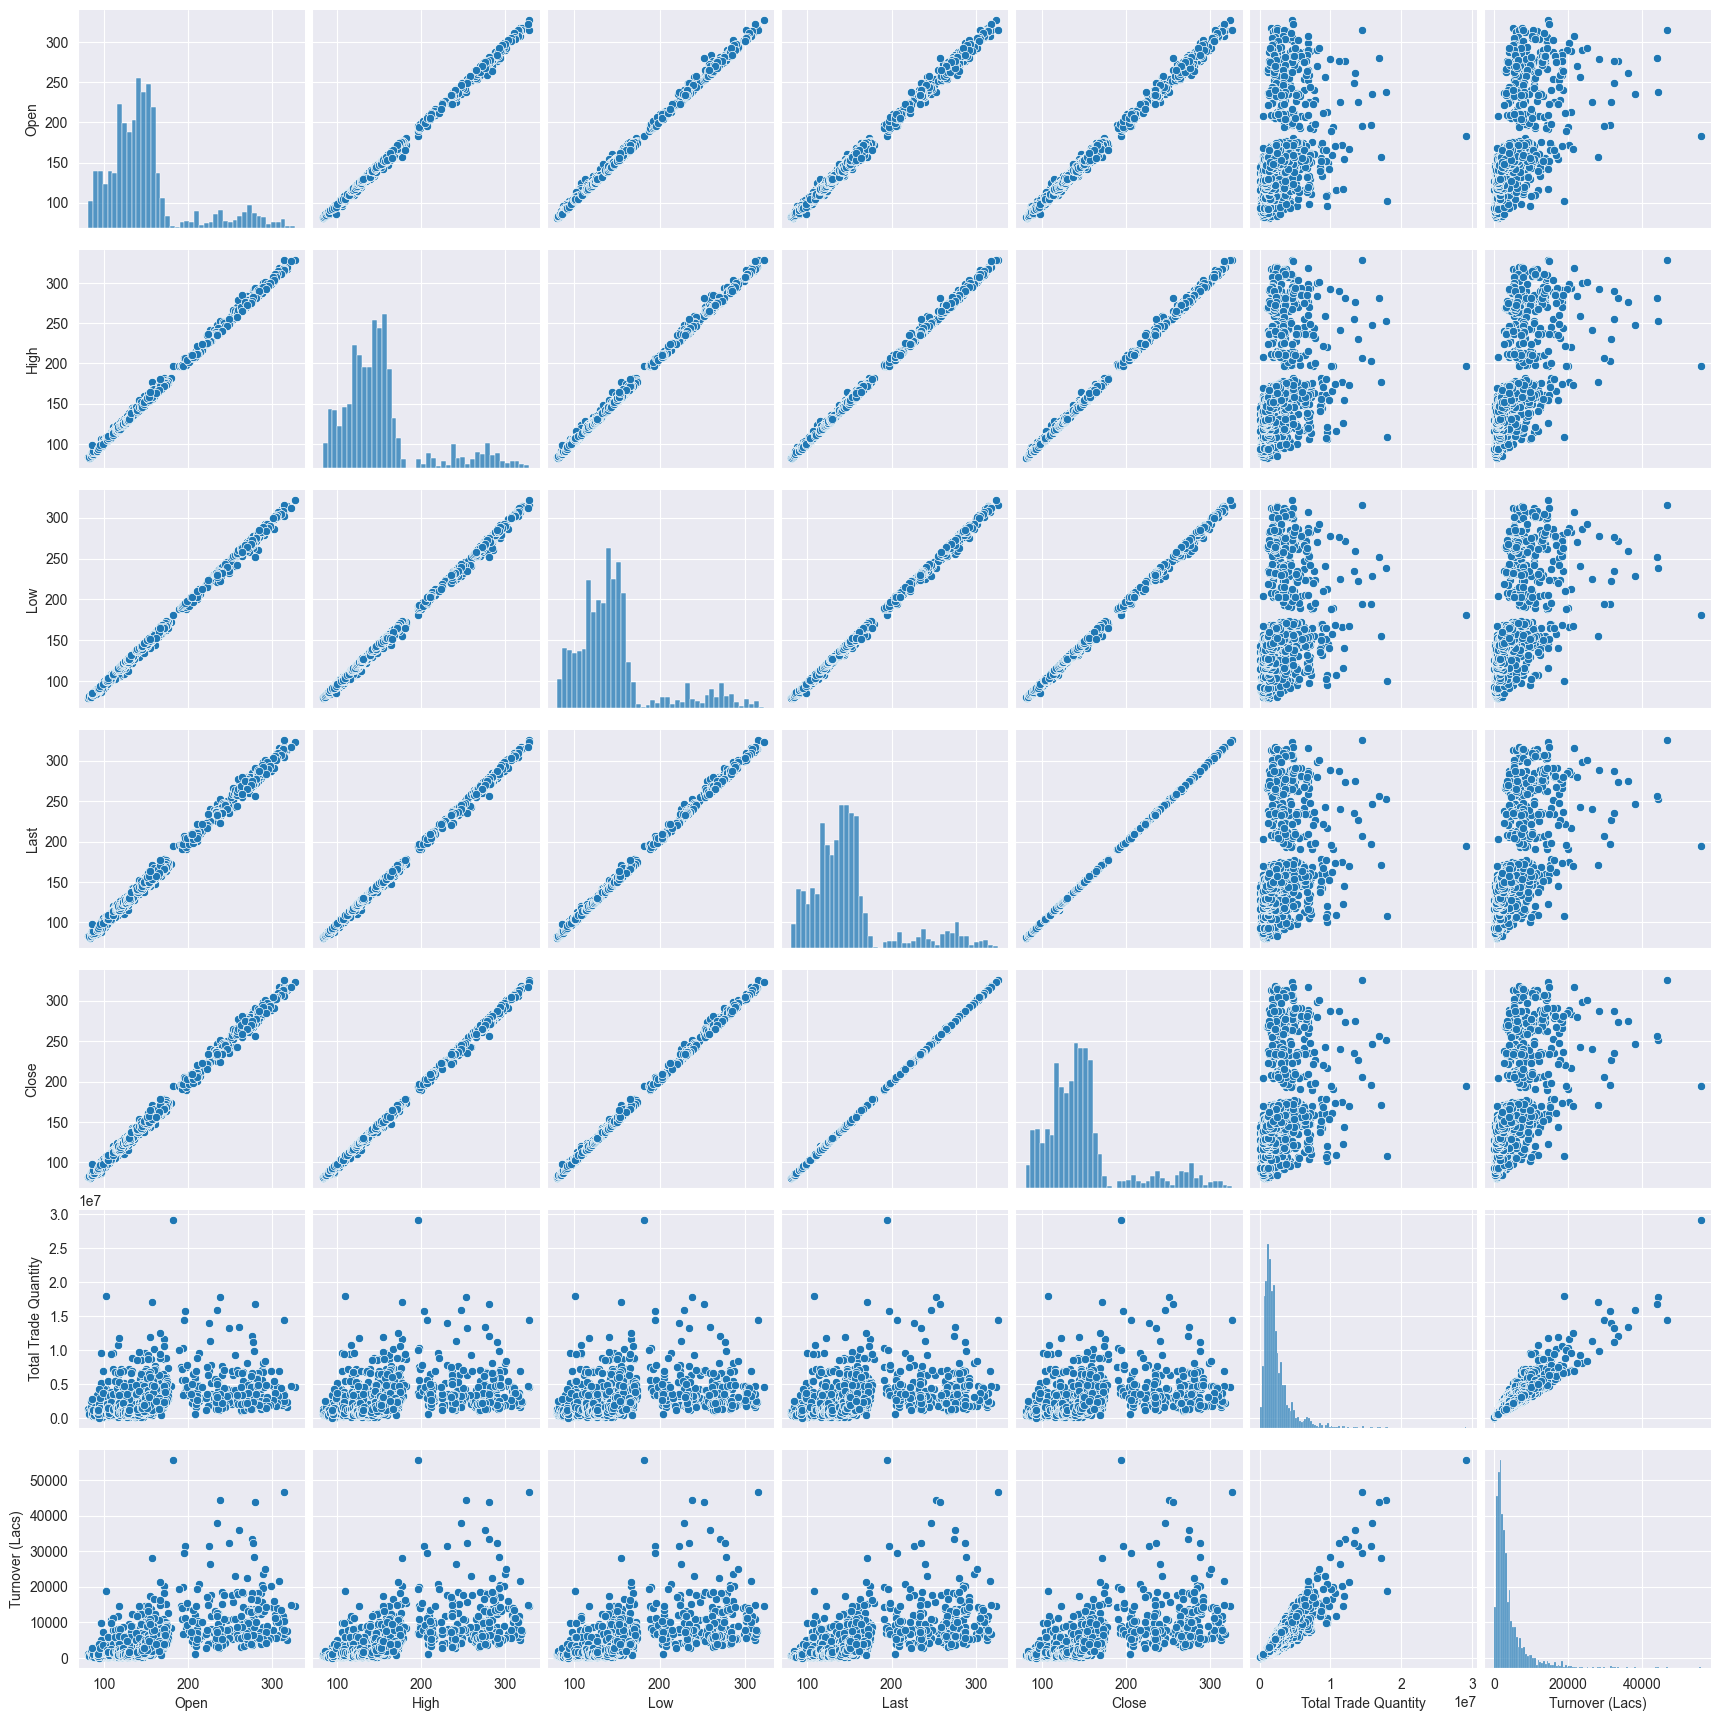

In [54]:
sns.pairplot(data)

In [55]:
data.Date = pd.to_datetime(data.Date,format = '%Y-%m-%d')
data.index = data['Date']
data.drop('Date',axis=1,inplace=True)
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


## Building the model

In [56]:
data_high=data.reset_index()['High']

<Axes: ylabel='High'>

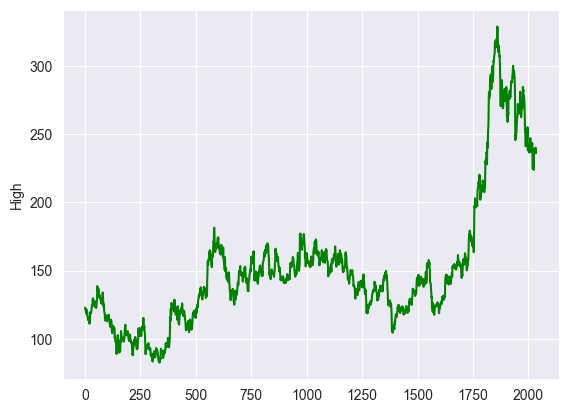

In [58]:
sns.set_style('darkgrid')
sns.lineplot(data_high,color = 'green')

## Feature Scaling

As LSTM are not robust to the scale of the data, so we apply MinMax Scaler to transform our values in the range of 0 and 1.

In [60]:

scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [61]:


data_high.shape
     

(2035, 1)

In [62]:
data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

## Splitting the data into train and test sets

In [63]:

training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data, test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]

In [64]:

training_size,test_size

(1526, 509)

In [66]:

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [67]:

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)


## Reshaping the input to (samples, time steps, features)

In [68]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [69]:
print("The shape of X_train is : ", X_train.shape), print("The shape of Y_train is : ", Y_train.shape)

The shape of X_train is :  (1425, 100, 1)
The shape of Y_train is :  (1425,)


(None, None)

In [70]:
print("The shape of X_test is : ", X_test.shape), print("The shape of Y_test is : ", Y_test.shape)

The shape of X_test is :  (408, 100, 1)
The shape of Y_test is :  (408,)


(None, None)

## Creating the LSTM Model

In [71]:

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [72]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 14s 207ms/step - loss: 0.0108 - val_loss: 0.0333
Epoch 2/100
23/23 [==============================] - 4s 173ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 3/100
23/23 [==============================] - 4s 166ms/step - loss: 8.6758e-04 - val_loss: 0.0034
Epoch 4/100
23/23 [==============================] - 4s 169ms/step - loss: 7.8895e-04 - val_loss: 0.0039
Epoch 5/100
23/23 [==============================] - 4s 174ms/step - loss: 7.7686e-04 - val_loss: 0.0037
Epoch 6/100
23/23 [==============================] - 4s 182ms/step - loss: 7.5800e-04 - val_loss: 0.0034
Epoch 7/100
23/23 [==============================] - 4s 182ms/step - loss: 7.0785e-04 - val_loss: 0.0038
Epoch 8/100
23/23 [==============================] - 5s 198ms/step - loss: 6.7007e-04 - val_loss: 0.0032
Epoch 9/100
23/23 [==============================] - 4s 180ms/step - loss: 6.5213e-04 - val_loss: 0.0042
Epoch 10/100
23/23 [==============================] - 4s 170ms

## Making predictions

In [74]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [75]:
#Transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

 ## Model Evaluation
 
### Calculating RMSE performance metrics


In [76]:
math.sqrt(mean_squared_error(Y_train, train_predict))
     

134.93665908894033

## Plotting the results

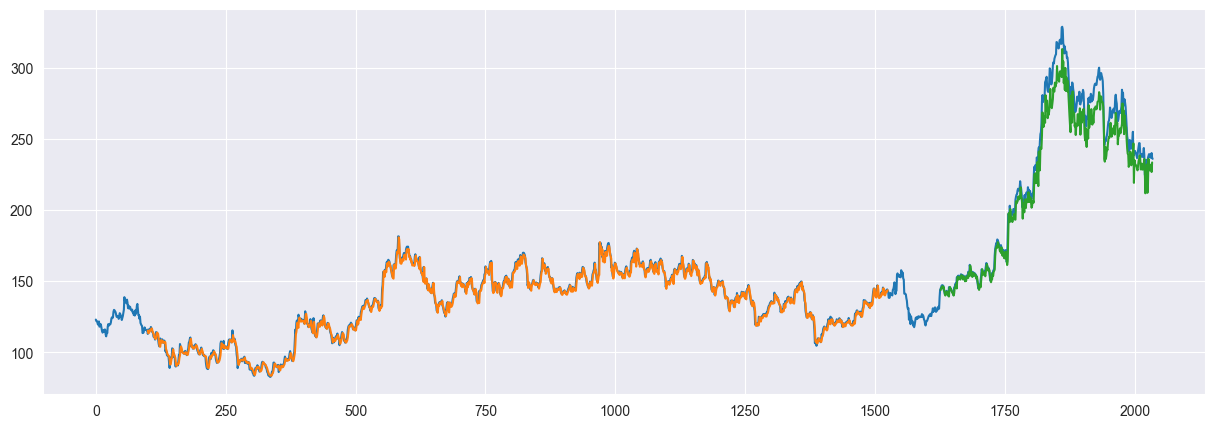

In [78]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()